# Idols Investigation

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [29]:
overall = pd.read_excel('./Data/Survivor idols found.xlsx')

# Remove extra stuff at the bottom
overall = overall.drop(overall.index[159:167])

# Filtering out asterisks and dashes from names
name = re.compile('[a-zA-Z]+ [a-zA-Z]+')
overall['Contestant'] = overall['Contestant'].apply(lambda x: name.search(x).group())

# Make single 'Sex' column
overall = overall.rename(columns={"M?": "Sex"})
overall = overall.drop('F?', axis=1)
overall['Sex'] = overall['Sex'].apply(lambda x: "M" if x == 1.0 else "F")

# Remove 'S' from season number
overall['Season'] = overall['Season'].apply(lambda x: int(x[1:]))

overall['Idols found'] = overall['Idols found'].fillna(0)
overall['Idols held'] = overall['Idols held'].apply(lambda x: int(x))
overall['Idols played'] = overall['Idols played'].fillna(0)
overall['Idols played'] = overall['Idols played'].apply(lambda x: int(x))
overall['Votes voided'] = overall['Votes voided'].fillna(0)
overall['Boot avoided'] = overall['Boot avoided'].fillna(False)
overall['Boot avoided'] = overall['Boot avoided'].apply(lambda x: True if x == 1 else False)
overall['Tie avoided'] = overall['Tie avoided'].fillna(False)
overall['Tie avoided'] = overall['Tie avoided'].apply(lambda x: True if x == 1 else False)
overall['Day found'] = overall['Day found'].fillna(0)
overall['Day found'] = overall['Day found'].apply(lambda x: int(x))
overall['Day played'] = overall['Day played'].fillna(0)
overall['Day played'] = overall['Day played'].apply(lambda x: int(x))
overall

,Contestant,Sex,Season,Idols found,Idols held,Idols played,Votes voided,Boot avoided,Tie avoided,Day found,Day played,Notes
0,Gary Hogeboom,M,11,1,1,1,0,False,False,24,0,"(*Played before vote, couldn't be voted against)"
1,Terry Deitz,M,12,1,1,0,0,False,False,0,0,"(*Super idol, found on Exile Island)"
2,Yul Kwon,M,13,1,1,0,0,False,False,0,0,"(*Super idol, found on Exile Island)"
3,Man Chan,M,14,1,1,1,4,True,False,17,36,"No vote split; Yau-Man saves himself, Stacy bo..."
4,Mookie Lee,M,14,1,1,0,0,False,False,20,0,Found at Moto camp; given to Alex at F9 Tribal...
5,Alex Angarita,F,14,0,1,1,0,False,False,0,27,"(Mookie gave his idol to Alex, who played it)"
6,Earl Cole,M,14,1,1,1,0,False,False,36,37,Found using Yau-Man and Earl's clues; played a...
7,Todd Herzog,M,15,1,1,0,0,False,False,17,0,"Frosti, Amanda present when Todd pries it off ..."
8,James Clement,M,15,1,2,0,0,False,False,19,0,(*Todd helped James find the first idol) James...
9,Amanda Kimmel,F,16,1,1,1,4,True,False,0,0,"No vote split; Amanda saves herself, Alexis bo..."


## Idol Analysis

In [30]:
# Percentage of idols that avoided a boot
boot_avoided_percent = len(overall[(overall['Idols played'] == 1) & overall['Boot avoided']]) / len(overall[overall['Idols played'] == 1])
print("Percentage of idols played that avoided a boot:", "{:.1%}".format(boot_avoided_percent))

Percentage of idols played that avoided a boot: 32.6%


In [31]:
# Percentage of idols that avoided a tie
tie_avoided_percent = len(overall[(overall['Idols played'] == 1) & overall['Tie avoided']]) / len(overall[overall['Idols played'] == 1])
print("Percentage of idols played that avoided a tie:", "{:.1%}".format(tie_avoided_percent))
print("Percentage of idols successfully played:", "{:.1%}".format(boot_avoided_percent + tie_avoided_percent))

Percentage of idols played that avoided a tie: 7.4%
Percentage of idols successfully played: 40.0%


In [32]:
# Percentage of idols played that blocked votes
votes_voided_percent = len(overall[(overall['Idols played'] == 1) & (overall['Votes voided'] > 0)]) / len(overall[overall['Idols played'] == 1])
print("Percentage of idols played that blocked votes:", "{:.1%}".format(votes_voided_percent))

Percentage of idols played that blocked votes: 64.2%


In [33]:
# Average number of votes blocked by a played idol
average_votes_voided = overall["Votes voided"].sum() / overall["Idols played"].sum()
print("Average votes voided per idol played:", "{:.2f}".format(average_votes_voided))

Average votes voided per idol played: 2.14


In [34]:
# Idols found but not played
idols_found_not_played = overall['Idols found'].sum() - overall['Idols played'].sum()
print("Number of idols that went unplayed:", idols_found_not_played)
idols_found_not_played_percent = (overall['Idols found'].sum() - overall['Idols played'].sum()) / overall['Idols found'].sum() 
print("Percentage of idols found that went unplayed:", "{:.1%}".format(idols_found_not_played_percent))

Number of idols that went unplayed: 36
Percentage of idols found that went unplayed: 27.5%


## Gender analysis

In [35]:
# Women vs men on finding idols
print("Idols found men vs. women:")
print(overall.groupby("Sex")['Idols found'].sum())

Idols found men vs. women:
Sex
F    39
M    92
Name: Idols found, dtype: int64


In [36]:
print("Idols success rate men vs. women")
overall[:][overall['Idols played'] == 1].groupby('Sex')[['Boot avoided', 'Idols played']].sum()
# Success rate of playing idols seems about equal

Idols success rate men vs. women


,Boot avoided,Idols played
Sex,,
F,10.0,33
M,21.0,62


## Seasonal analysis

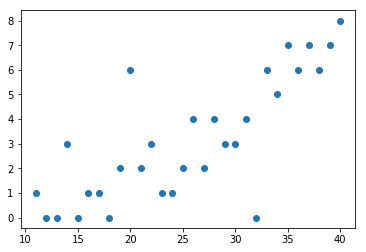

In [37]:
# Idols played by season
plt.scatter(overall.groupby('Season')['Idols played'].sum().index, overall.groupby('Season')['Idols played'].sum())

In [38]:
# Season where idols had the greatest impact
overall.groupby('Season')[['Votes voided', 'Boot avoided', 'Tie avoided']].sum().sort_values(by='Boot avoided', ascending=False).head(10)

,Votes voided,Boot avoided,Tie avoided
Season,,,
34,12,4.0,0.0
40,14,3.0,0.0
38,12,3.0,0.0
29,10,3.0,0.0
30,16,3.0,0.0
37,16,2.0,0.0
35,15,2.0,1.0
39,14,2.0,0.0
31,20,2.0,2.0


## Player analysis

In [39]:
# Best idol finders (overall)
print("Best idol finders")
print(overall.groupby('Contestant')['Idols found'].sum().sort_values(ascending=False).head(10))

Best idol finders
Contestant
Russell Hantz       5
Ben Driebergen      4
Tony Vlachos        4
Rick Devens         4
Tai Trang           4
Kelley Wentworth    3
Kellee Kim          3
Natalie Anderson    3
Malcolm Freberg     3
Ozzy Lusth          2
Name: Idols found, dtype: int64


In [40]:
# Most frequent idol players
print("Most idols played by contestant")
print(overall.groupby('Contestant')['Idols played'].sum().sort_values(ascending=False).head(10))

Most idols played by contestant
Contestant
Ben Driebergen      4
Rick Devens         4
Russell Hantz       4
Malcolm Freberg     3
Natalie Anderson    3
Tony Vlachos        3
Tai Trang           3
David Wright        2
Dan Rengering       2
Parvati Shallow     2
Name: Idols played, dtype: int64


In [41]:
# Most idols found in a single season (and who did it)
overall.groupby(['Season', 'Contestant'])['Idols found'].sum().sort_values(ascending=False).head(22)
# Russel Hantz only person to find multiple idols in multiple seasons

Season  Contestant        
38      Rick Devens           4
28      Tony Vlachos          3
19      Russell Hantz         3
35      Ben Driebergen        3
34      Tai Trang             3
39      Kellee Kim            3
35      Joe Mena              2
33      Adam Klein            2
37      Davie Rickenbacker    2
20      Russell Hantz         2
36      Michael Yerger        2
29      Jon Misch             2
33      David Wright          2
39      Janet Carbin          2
26      Malcolm Freberg       2
        Reynold Toepfer       2
27      Tyson Apostol         2
31      Kelley Wentworth      2
        Jeremy Collins        2
35      Ryan Ulrich           2
40      Natalie Anderson      2
37      Dan Rengering         2
Name: Idols found, dtype: int64

In [42]:
# Most votes voided by a single idol
print("Max votes voided by single idol:")
print(overall[["Contestant", "Votes voided"]].sort_values(by="Votes voided", ascending=False).head(10))

Max votes voided by single idol:
             Contestant  Votes voided
79     Kelley Wentworth             9
144      Karishma Patel             7
77           Jenn Brown             7
117      Michael Yerger             7
122  Davie Rickenbacker             7
22        Russell Hantz             7
108      Ben Driebergen             6
96            Tai Trang             6
50      Jonathan Penner             5
137          Kellee Kim             5


In [43]:
# Most successful players at avoiding boot using an idol
overall.groupby('Contestant')[['Boot avoided', 'Idols played']].sum().sort_values(by='Boot avoided', ascending=False).head(10)
# Tai Trang only player with 100% success rate and more than one idol

,Boot avoided,Idols played
Contestant,,
Ben Driebergen,3.0,4
Tai Trang,3.0,3
Natalie Anderson,2.0,3
Rick Devens,2.0,4
Russell Hantz,2.0,4
Christian Hubicki,1.0,1
Sarah Lacina,1.0,1
Jeremy Collins,1.0,2
Denise Stapley,1.0,2


In [44]:
# Top career votes blocked with idols
overall.groupby('Contestant')['Votes voided'].sum().sort_values(ascending=False).head(10)

Contestant
Kelley Wentworth      12
Russell Hantz         11
Ben Driebergen        11
Davie Rickenbacker     9
Tai Trang              9
Jeremy Collins         8
Rick Devens            8
Michael Yerger         7
Natalie Anderson       7
Jenn Brown             7
Name: Votes voided, dtype: int64

In [45]:
# Top career average votes voided per idol played
overall.groupby('Contestant')['Votes voided'].mean().sort_values(ascending=False).head(10)

Contestant
Jenn Brown            7.0
Karishma Patel        7.0
Carolyn Rivera        5.0
Christian Hubicki     5.0
Jonathan Penner       5.0
Davie Rickenbacker    4.5
Mike Holloway         4.0
Jeremy Collins        4.0
Man Chan              4.0
Amanda Kimmel         4.0
Name: Votes voided, dtype: float64

In [46]:
# Get the winners
all_time = pd.read_excel('./Data/Leaderboard_ S1-S40.xlsx')
all_time['single-'] = all_time['single-'].apply(lambda x: int(x[1:]))
winners = all_time[['single-', 'contestant', 'Finish']][all_time['Finish'] == 1].sort_values(by='single-')
winners = winners.rename(columns={"single-": "Season", "contestant": "Contestant"})

In [47]:
# Winners who played an idol on their way to a win
idol_players = overall[['Season', 'Contestant']][overall['Idols played'] > 0]
pd.merge(winners, idol_players, left_on=['Season', 'Contestant'], right_on=['Season', 'Contestant'], how='inner')

,Season,Contestant,Finish
0,14,Earl Cole,1
1,27,Tyson Apostol,1
2,27,Tyson Apostol,1
3,28,Tony Vlachos,1
4,28,Tony Vlachos,1
5,29,Natalie Anderson,1
6,30,Mike Holloway,1
7,31,Jeremy Collins,1
8,31,Jeremy Collins,1
9,33,Adam Klein,1


In [48]:
# Winners who avoided a boot with an idol on their way to a win
# Important note: Sarah is Legacy Advantage and Natalie played her idol for someone else
idol_lifesavers = overall[['Season', 'Contestant']][(overall['Boot avoided'] == True)]
pd.merge(winners, idol_lifesavers, left_on=['Season', 'Contestant'], right_on=['Season', 'Contestant'], how='inner')

,Season,Contestant,Finish
0,29,Natalie Anderson,1
1,30,Mike Holloway,1
2,31,Jeremy Collins,1
3,34,Sarah Lacina,1
4,35,Ben Driebergen,1
5,35,Ben Driebergen,1
6,38,Chris Underwood,1
